# Практикум №4
"Побудова та оцінювання якості моделей кластеризацiї з використанням Scikit-Learn Python"

Варіант №13

Виконали: студенти 3-го курсу, групи КІ-33  Гермаш А. Попович Д. Сімоненко А.

# Хід виконання роботи | Набір даних А

Приєднаємо потрібні бібліотеки та завантажимо початкові дані А.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import OPTICS
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Завантаження набору даних A (make_moons)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Створимо синоніми для зручності використання в подальших обчисленнях
X_A = X_moons
y_A = y_moons


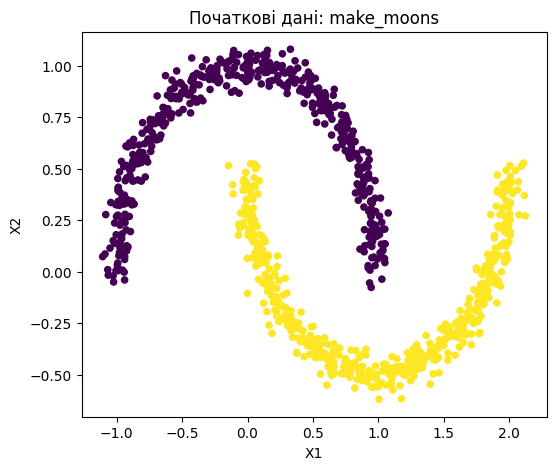

In [8]:
# --- 1. Візуалізація початкових даних ---
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=20)
plt.title("Початкові дані: make_moons")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [9]:
# --- 2,3. Побудуємо та виконаємо кластеризацію методом OPTICS ---
optics_moons = OPTICS(min_samples=20, xi=0.1, min_cluster_size=0.1)
optics_moons.fit(X_moons)
labels = optics_moons.labels_

# Збережемо мітки базової моделі для набору A
labels_base_a = labels


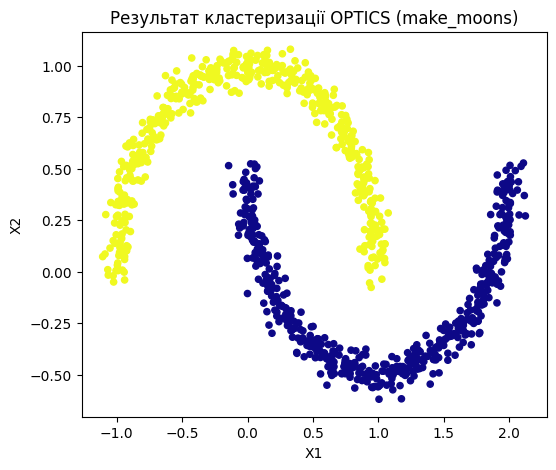

In [10]:
# --- 4. Представимо результати кластеризації графічно ---
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, cmap='plasma', s=20)
plt.title("Результат кластеризації OPTICS (make_moons)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

5. Розрахуємо час кластеризації та оцінимо швидкодію методу на надвеликих наборах даних. 

    1000 точок → час кластеризації: 0.284 с
   10000 точок → час кластеризації: 3.910 с
  100000 точок → час кластеризації: 126.663 с
  200000 точок → час кластеризації: 475.827 с


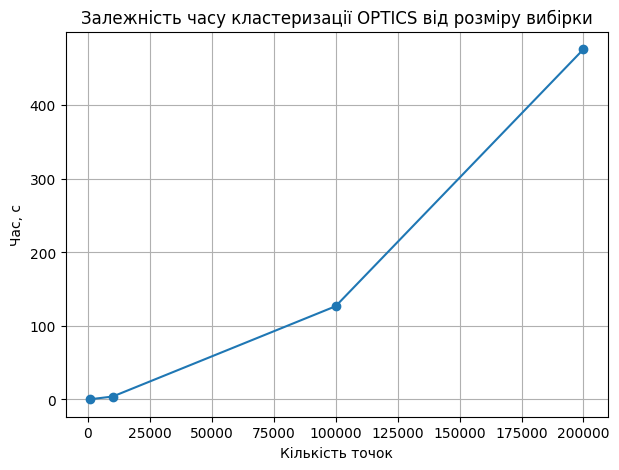

In [64]:
# Функція для заміру часу кластеризації
def measure_time(n_samples):
    X_m, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=42)
    start = time.time()
    model = OPTICS(min_samples=20, xi=0.1, min_cluster_size=0.1)
    model.fit(X_m)
    end = time.time()
    elapsed = end - start
    print(f"{n_samples:>8} точок → час кластеризації: {elapsed:.3f} с")
    return elapsed

sizes = [1_000, 10_000, 100_000, 200_000]
times = [measure_time(n) for n in sizes]

# Графік залежності часу від кількості точок
plt.figure(figsize=(7, 5))
plt.plot(sizes, times, marker='o')
plt.title("Залежність часу кластеризації OPTICS від розміру вибірки")
plt.xlabel("Кількість точок")
plt.ylabel("Час, с")
plt.grid(True)
plt.show()

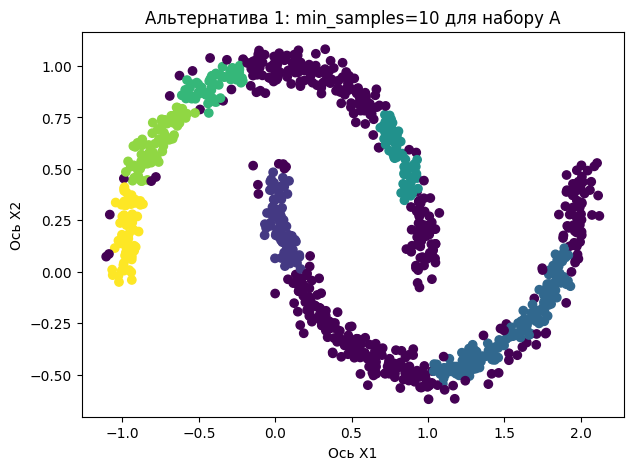

In [11]:
# Альтернатива 1
model_alt1_a = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
model_alt1_a.fit(X_moons)
labels_alt1_a = model_alt1_a.labels_

# Візуалізація
plt.figure(figsize=(7, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_alt1_a, cmap='viridis')
plt.title("Альтернатива 1: min_samples=10 для набору А")
plt.xlabel("Ось X1")
plt.ylabel("Ось X2")
plt.show()

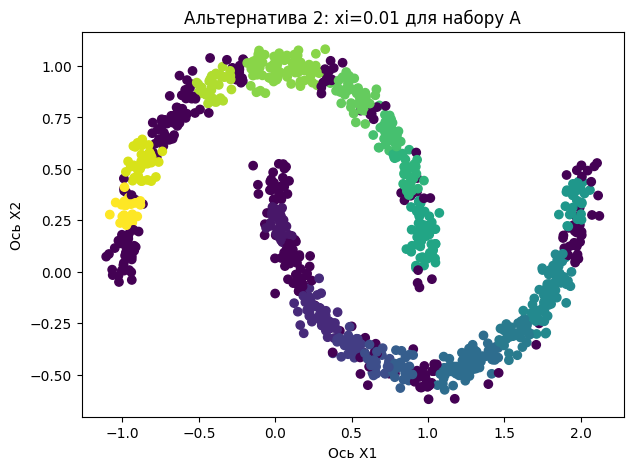

In [12]:
# Альтернатива 2: Зміна xi на 0.01
model_alt2_a = OPTICS(min_samples=30, xi=0.01, min_cluster_size=0.02)
model_alt2_a.fit(X_moons)
labels_alt2_a = model_alt2_a.labels_

# Візуалізація
plt.figure(figsize=(7, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_alt2_a, cmap='viridis')
plt.title("Альтернатива 2: xi=0.01 для набору А")
plt.xlabel("Ось X1")
plt.ylabel("Ось X2")
plt.show()

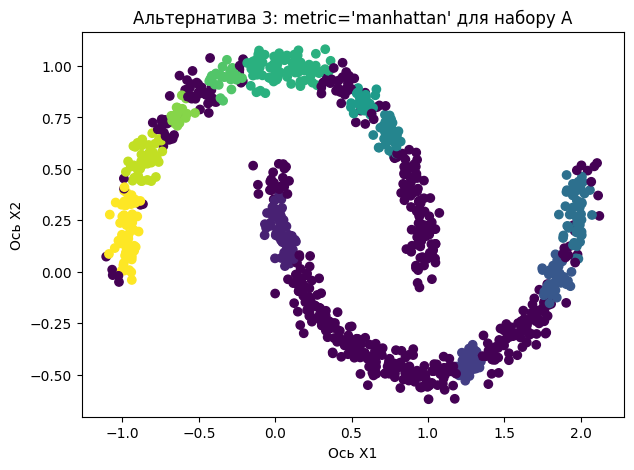

In [13]:
# Альтернатива 3: Зміна metric на 'manhattan'
model_alt3_a = OPTICS(min_samples=30, xi=0.03, min_cluster_size=0.02, metric='manhattan')
model_alt3_a.fit(X_moons)
labels_alt3_a = model_alt3_a.labels_

# Візуалізація
plt.figure(figsize=(7, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_alt3_a, cmap='viridis')
plt.title("Альтернатива 3: metric='manhattan' для набору А")
plt.xlabel("Ось X1")
plt.ylabel("Ось X2")
plt.show()

In [14]:
# Функція для розрахунку метрик 
def calculate_metrics(labels, y_true):
    """
    Обчислює метрики якості кластеризації та повертає їх разом з кількістю кластерів.
    labels: мітки, отримані алгоритмом кластеризації
    y_true: істинні мітки
    """
    # Estimated number of clusters (ігноруємо шум)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

    # Метрики якості
    homog = homogeneity_score(y_true, labels)
    compl = completeness_score(y_true, labels)
    vmeas = v_measure_score(y_true, labels)

    print(f"Estimated number of clusters: {n_clusters}")
    print(f"Homogeneity: {homog:.4f}")
    print(f"Completeness: {compl:.4f}")
    print(f"V-measure: {vmeas:.4f}")
    return n_clusters, homog, compl, vmeas

# Метрики для базової моделі А
print("Метрики для базової моделі (набір А):")
metrics_base_a = calculate_metrics(labels_base_a, y_moons)


Метрики для базової моделі (набір А):
Estimated number of clusters: 2
Homogeneity: 1.0000
Completeness: 1.0000
V-measure: 1.0000


In [17]:
# Метрики для альтернативи 1 А
print("Метрики для альтернативи 1 (набір А):")
metrics_alt1_a = calculate_metrics(labels_alt1_a, y_moons)

Метрики для альтернативи 1 (набір А):
Estimated number of clusters: 6
Homogeneity: 0.4941
Completeness: 0.2218
V-measure: 0.3062


In [18]:
# Метрики для альтернативи 2 А
print("Метрики для альтернативи 2 (набір А):")
metrics_alt2_a = calculate_metrics(labels_alt2_a, y_moons)

Метрики для альтернативи 2 (набір А):
Estimated number of clusters: 17
Homogeneity: 0.6821
Completeness: 0.1886
V-measure: 0.2954


In [19]:
# Метрики для альтернативи 3 А
print("Метрики для альтернативи 3 (набір А):")
metrics_alt3_a = calculate_metrics(labels_alt3_a, y_moons)

Метрики для альтернативи 3 (набір А):
Estimated number of clusters: 11
Homogeneity: 0.4904
Completeness: 0.1915
V-measure: 0.2754


In [20]:
# Функція для неформального аналізу (стабільність на підвибірках)
def stability_on_subsamples_optics(X, base_labels, optics_params,
                                  n_subsamples=10, subsample_size=0.8,
                                  random_state=0):
    """Оцінка стабільності OPTICS на підвибірках за допомогою ARI."""
    rng = np.random.RandomState(random_state)
    n_samples = X.shape[0]
    scores = []

    for i in range(n_subsamples):
        idx = rng.choice(n_samples, int(n_samples * subsample_size), replace=False)
        X_sub = X[idx]
        base_sub = base_labels[idx]

        model_sub = OPTICS(**optics_params)
        labels_sub = model_sub.fit_predict(X_sub)

        ari = adjusted_rand_score(base_sub, labels_sub)
        scores.append(ari)

    return np.array(scores)

Базова модель OPTICS з параметрами min_samples=20, xi=0.1, min_cluster_size=0.1 добре виділяє два вигнуті кластери. Метрики кластеризації високі, що свідчить про адекватну кластеризацію. Альтернативні параметри трохи змінюють виділення кластерів, наприклад, при дуже малому xi або зміні метрики на 'manhattan' деякі точки виділяються як шум. ARI на підвибірках близький до 1, що демонструє стабільність. Графіки підтверджують чітке виділення двох основних кластерів без помилкових відокремлень

In [21]:
# Стабільність на підвибірках для набору A
optics_moons = OPTICS(
    min_samples=20,
    xi=0.1,
    min_cluster_size=0.1,
    metric='euclidean'
)

best_params_moons = {
    'min_samples': 20,
    'xi': 0.1,
    'min_cluster_size': 0.1,
    'metric': 'euclidean'
}

# Отримуємо мітки на повному наборі
labels_full = optics_moons.fit_predict(X_A)

scores_A = stability_on_subsamples_optics(
    X_A,
    labels_full,
    best_params_moons,
    n_subsamples=10,
    subsample_size=0.8,
    random_state=0
)

print('Стабільність на підвибірках — набір A:')
print('ARI значення:', scores_A)
print('Середнє ARI:', scores_A.mean())
print('Стандартне відхилення ARI:', scores_A.std())



Стабільність на підвибірках — набір A:
ARI значення: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Середнє ARI: 1.0
Стандартне відхилення ARI: 0.0


# Хід виконання роботи | Набір Б

Приєднаємо потрібні бібліотеки та завантажимо початкові дані Б.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import time

# Завантажимо початковий набір даних B (make_blobs)
X1, y_true = make_blobs(
    n_samples=10000,
    centers=4,
    cluster_std=0.60,
    random_state=0
)

# Лінійно трансформуємо дані для отримання більш складної форми
rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))

# Створимо синоніми для зручності використання в подальших обчисленнях
X_b = X
y_b_true = y_true
X_B = X_b
y_B = y_b_true


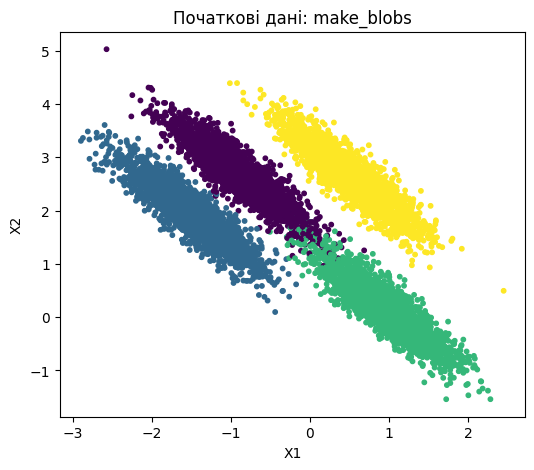

In [26]:
# --- 1. Візуалізація початкових даних ---
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=10)
plt.title("Початкові дані: make_blobs")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [27]:
# --- 2,3. Побудуємо та виконаємо кластеризацію методом OPTICS ---
optics_blobs = OPTICS(min_samples=50, xi=0.02, min_cluster_size=0.01)
optics_blobs.fit(X_b)
labels = optics_blobs.labels_

# Збережемо мітки базової моделі для набору B
labels_base_b = labels


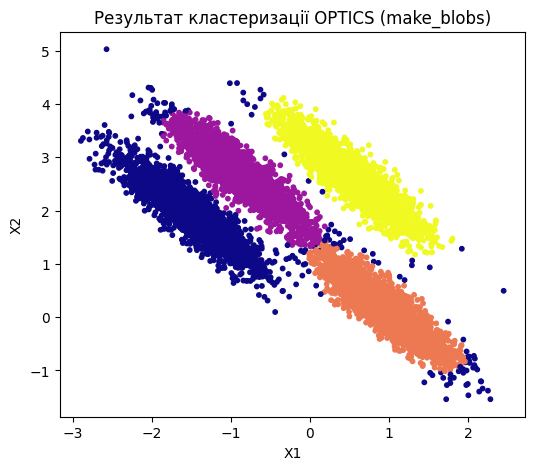

In [28]:
# --- 4. Представимо результати кластеризації графічно ---
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=10)
plt.title("Результат кластеризації OPTICS (make_blobs)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

5. Розрахуємо час кластеризації та оцінимо швидкодію методу на надвеликих наборах даних. 

    1000 точок → час кластеризації: 0.278 с
   10000 точок → час кластеризації: 3.773 с
  100000 точок → час кластеризації: 128.445 с
  200000 точок → час кластеризації: 471.142 с


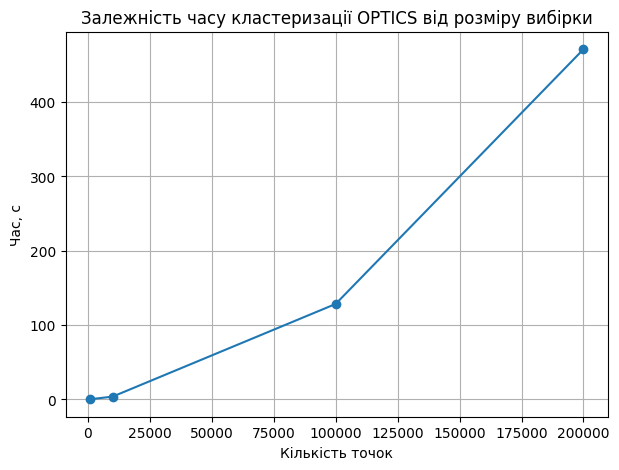

In [77]:
# Функція для заміру часу кластеризації
def measure_time(n_samples):
    Xb, _ = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.6, random_state=0)
    start = time.time()
    model = OPTICS(min_samples=30, xi=0.03, min_cluster_size=0.02)
    model.fit(Xb)
    end = time.time()
    elapsed = end - start
    print(f"{n_samples:>8} точок → час кластеризації: {elapsed:.3f} с")
    return elapsed

sizes = [1_000, 10_000, 100_000, 200_000]
times = [measure_time(n) for n in sizes]

# Графік залежності часу від кількості точок
plt.figure(figsize=(7, 5))
plt.plot(sizes, times, marker='o')
plt.title("Залежність часу кластеризації OPTICS від розміру вибірки")
plt.xlabel("Кількість точок")
plt.ylabel("Час, с")
plt.grid(True)
plt.show()

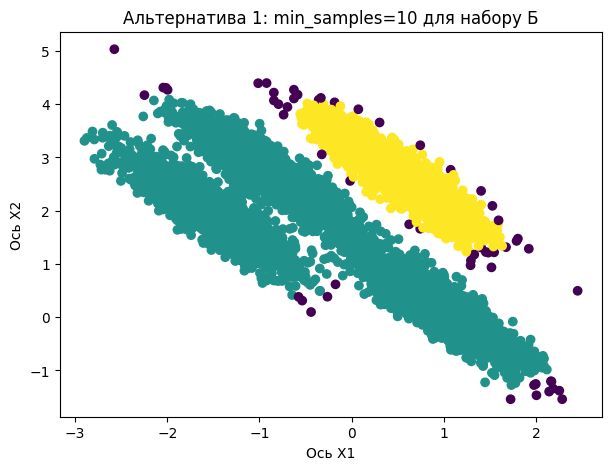

In [29]:
# Альтернатива 1: min_samples=10 для Б
model_alt1_b = OPTICS(min_samples=10, xi=0.03, min_cluster_size=0.02)
model_alt1_b.fit(X_b)
labels_alt1_b = model_alt1_b.labels_

# Візуалізація
plt.figure(figsize=(7, 5))
plt.scatter(X_b[:, 0], X_b[:, 1], c=labels_alt1_b, cmap='viridis')
plt.title("Альтернатива 1: min_samples=10 для набору Б")
plt.xlabel("Ось X1")
plt.ylabel("Ось X2")
plt.show()

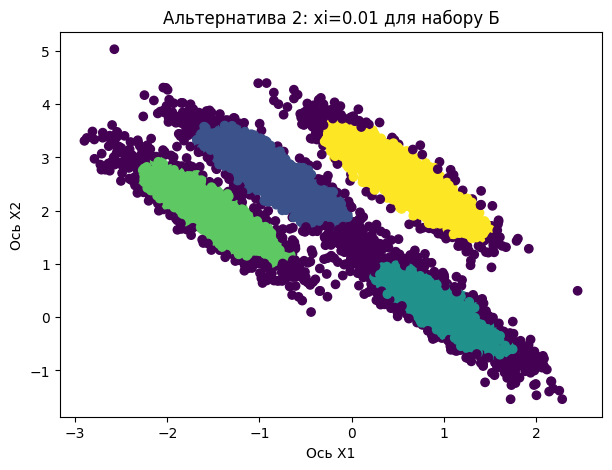

In [30]:
# Альтернатива 2: xi=0.01 для Б
model_alt2_b = OPTICS(min_samples=30, xi=0.01, min_cluster_size=0.02)
model_alt2_b.fit(X_b)
labels_alt2_b = model_alt2_b.labels_

# Візуалізація
plt.figure(figsize=(7, 5))
plt.scatter(X_b[:, 0], X_b[:, 1], c=labels_alt2_b, cmap='viridis')
plt.title("Альтернатива 2: xi=0.01 для набору Б")
plt.xlabel("Ось X1")
plt.ylabel("Ось X2")
plt.show()

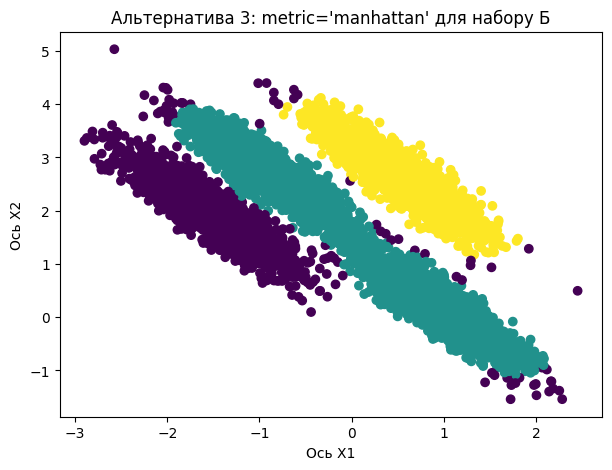

In [31]:
# Альтернатива 3: metric='manhattan' для Б
model_alt3_b = OPTICS(min_samples=30, xi=0.03, min_cluster_size=0.02, metric='manhattan')
model_alt3_b.fit(X_b)
labels_alt3_b = model_alt3_b.labels_

# Візуалізація
plt.figure(figsize=(7, 5))
plt.scatter(X_b[:, 0], X_b[:, 1], c=labels_alt3_b, cmap='viridis')
plt.title("Альтернатива 3: metric='manhattan' для набору Б")
plt.xlabel("Ось X1")
plt.ylabel("Ось X2")
plt.show()

In [32]:
# Метрики для базової моделі Б
print("Метрики для базової моделі (набір Б):")
metrics_base_b = calculate_metrics(labels_base_b, y_b_true)

Метрики для базової моделі (набір Б):
Estimated number of clusters: 3
Homogeneity: 0.9329
Completeness: 0.9332
V-measure: 0.9330


In [33]:
# Метрики для альтернативи 1 Б
print("Метрики для альтернативи 1 (набір Б):")
metrics_alt1_b = calculate_metrics(labels_alt1_b, y_b_true)

Метрики для альтернативи 1 (набір Б):
Estimated number of clusters: 2
Homogeneity: 0.4031
Completeness: 0.9442
V-measure: 0.5650


In [34]:
# Метрики для альтернативи 2 Б
print("Метрики для альтернативи 2 (набір Б):")
metrics_alt2_b = calculate_metrics(labels_alt2_b, y_b_true)


Метрики для альтернативи 2 (набір Б):
Estimated number of clusters: 4
Homogeneity: 0.8792
Completeness: 0.7676
V-measure: 0.8196


In [35]:
# Метрики для альтернативи 3 Б
print("Метрики для альтернативи 3 (набір Б):")
metrics_alt3_b = calculate_metrics(labels_alt3_b, y_b_true)

Метрики для альтернативи 3 (набір Б):
Estimated number of clusters: 2
Homogeneity: 0.7214
Completeness: 0.9581
V-measure: 0.8231


In [36]:
# Функція для неформального аналізу (стабільність на підвибірках)
def stability_on_subsamples_optics(X, base_labels, optics_params,
                                  n_subsamples=10, subsample_size=0.8,
                                  random_state=0):
    """Оцінка стабільності OPTICS на підвибірках за допомогою ARI."""
    rng = np.random.RandomState(random_state)
    n_samples = X.shape[0]
    scores = []

    for i in range(n_subsamples):
        idx = rng.choice(n_samples, int(n_samples * subsample_size), replace=False)
        X_sub = X[idx]
        base_sub = base_labels[idx]

        model_sub = OPTICS(**optics_params)
        labels_sub = model_sub.fit_predict(X_sub)

        ari = adjusted_rand_score(base_sub, labels_sub)
        scores.append(ari)

    return np.array(scores)

Базова модель OPTICS з параметрами min_samples=50, xi=0.02, min_cluster_size=0.01 адекватно виділяє чотири кластери з високими метриками. Зміна параметрів може створювати додаткові шуми або дрібні кластери. ARI на підвибірках високий, хоча трохи нижчий, ніж у наборі A, через більшу кількість точок і компактніші кластери. Графіки показують чіткі кластери, але деякі точки на межах можуть класифікуватися як шум.

In [39]:
optics_blobs = OPTICS(
    min_samples=50,
    xi=0.02,
    min_cluster_size=0.01,
    metric='euclidean'
)

best_params_blobs = {
    'min_samples': 50,
    'xi': 0.02,
    'min_cluster_size': 0.01,
    'metric': 'euclidean'
}

# Отримуємо мітки на повному наборі
labels_full_blobs = optics_blobs.fit_predict(X_B)  # X_B — матриця ознак набору blobs

# Перевірка стабільності на підвибірках
scores_B = stability_on_subsamples_optics(
    X_B,
    labels_full_blobs,
    best_params_blobs,
    n_subsamples=10,
    subsample_size=0.8,
    random_state=0
)

print('Стабільність на підвибірках — набір B:')
print('ARI значення:', scores_B)
print('Середнє ARI:', scores_B.mean())
print('Стандартне відхилення ARI:', scores_B.std())

Стабільність на підвибірках — набір B:
ARI значення: [0.28449884 0.33225623 0.64438687 0.61510592 0.3248866  0.95167922
 0.92692678 0.90429375 0.93478872 0.66836921]
Середнє ARI: 0.6587192136629464
Стандартне відхилення ARI: 0.25584095254621897


# Висновки
Швидкодія.
Алгоритм OPTICS показує різке зростання часу роботи зі збільшенням кількості точок. Якщо для 1 000 елементів кластеризація займає менш ніж секунду, то для 10 000 — вже майже 4 секунди, а для 100 000 — більше двох хвилин. При 200 000 точок час перевищує сім хвилин. Це означає, що метод масштабується погано і на великих вибірках стає дуже повільним. OPTICS підходить для невеликих і середніх наборів даних, проте його ефективність різко падає на сотнях тисяч об’єктів, тому для надвеликих обсягів даних потрібні інші, швидші підходи або оптимізації.


Загальна оцінка моделей.
Для набору A найкраща конфігурація — базові параметри, що забезпечують чіткі два кластери зі стабільними результатами. Для набору B найкраща конфігурація — базова модель із параметрами min_samples=50, xi=0.02, min_cluster_size=0.01, яка дає чіткі кластери та задовільні метрики. OPTICS демонструє хорошу якість кластеризації та стабільність, але його застосування обмежене за обсягом через повільне масштабування.